# 2. Kinematic modeling (Solution)

The __kinematic model__ of a robot is a set of equations describing the robot's motion. It relates the joint velocities (e.g. angular velocities in $rad/s$ for revolute joints) to the end-effector velocity. Similarily to the geometric model, we define 

- __Direct Kinematic Model (DKM)__ : given joint velocities, it gives the velocity of the end-effector (tool, hand, foot, etc.) with respect to the robot's base frame

- __Inverse Kinematic Model (IKM)__ : given an end-effector velocity (and orientation), it gives the joint velocities 

If $q$ denotes a joint position, then the corresponding velocity is defined as the derivative $\dot{q} = \frac{dq}{dt}$. Similarily, the end-effector velocity is denoted $\dot{p} = \frac{d p}{dt} = (\frac{d x_p}{dt}, \frac{d y_p}{dt})$. The kinematic model can also be thought, to some extent, as a mapping between a joint space and a task space. In this notebook, we will study the direct and inverse kinematics of the 1R and 2R robots. 

__Note__: if you are a bit rusty on derivatives, I suggest you take a look at this [cheatsheet](https://www.mathsisfun.com/calculus/derivatives-rules.html)

# 1R robot

Consider the simple robot arm consisting of 1 revolute joint and 1 link. 

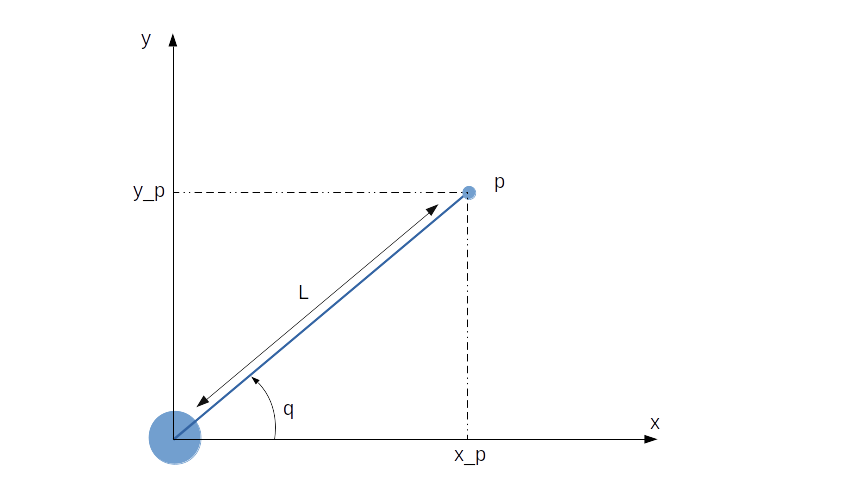

In [1]:
## Author: Sebastien
## Date : 22/06/2020

# Import required packages for this notebook
import numpy as np
from matplotlib import pyplot as plt
import IPython
from IPython.display import Image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

np.set_printoptions(precision=4)

# Display the 1R robot
Image("1dof.png")

The DKM relates $\dot{q}$ to $\dot{p}$. Recall that we already have a relation between $q$ and $p=(x_p,y_p)$ : the DGM. As seen in the previous Notebook, the DGM is a function taking $q$ as an input that outputs $p$. Let us rename the DGM function as $f$. As seen before, the direct geometry of the 1R robot is expressed by the equation

$$
p = f(q)
$$

where $f(q)$ is the vector in $\mathbb{R}^2$ 
$$
f(q) = \begin{bmatrix} L \cos(q) \\
                       L \sin(q) \end{bmatrix}
$$

Taking the derivatives with respect to the time variable $t$ on both sides of the above equation, we obtain 

$$
\dot{p} = \frac{d f(q)}{dt}
$$

Applying the [chain rule](https://www.mathsisfun.com/calculus/derivatives-rules.html) to calculate the right-hand side of the above equation, we get

$$
\dot{p} = \frac{d f(q)}{d q} \frac{dq}{dt} \\
\dot{p} = \frac{df(q)}{d q} \dot{q}
$$

And that's it : the DKM is given by the derivative of the DGM with respect to $q$. Recall the expression of the DGM: we derived 

$$
f(q) = \begin{bmatrix} L \cos(q) \\
                       L \sin(q) \end{bmatrix}
$$

Using [rules of differentiation for trigonometric functions](https://www.mathsisfun.com/calculus/derivatives-rules.html), we get the derivative with respect to $q$ as

$$
 \frac{\partial f(q)}{\partial q} = \begin{bmatrix} -L \sin(q) \\
                                                  L \cos(q) \end{bmatrix}
$$

Therefore the DKM is given by the equation

$$
\dot{p} = \begin{bmatrix} \dot{x_p} \\
                \dot{y_p}\end{bmatrix} = \begin{bmatrix} -L \sin(q) \\
                                                                  L \cos(q) \end{bmatrix} \dot{q}
$$ 


__Question__ : Complete the DKM function (using the theoretical results above)
    
__Answer__ :

In [2]:
# Define the link length
L = 1.

# Function corresponding to the direct kinematic model
def DKM(q, qdot):
    '''
    Input : joint angular position and velocity (in rad and rad/s)
    Output : end-effector position (in m/s)
    '''
    
    xdot_p = -L*np.sin(q)*qdot
    ydot_p = L*np.cos(q)*qdot
    
    pdot = np.array([xdot_p, ydot_p])
    
    return pdot

# Test the DGM and display the result
q = np.pi/4
qdot = 1.
pdot = DKM(q, qdot)
print("The end-effector velocity corresponding to qdot = "+str(qdot)+" is : pdot = "+str(pdot))

The end-effector velocity corresponding to qdot = 1.0 is : pdot = [-0.7071  0.7071]


The IKM solves the converse problem: given an end-effector velocity (task space), it returns the corresponding velocity. However it is not always possible to determine a unique solution to the inverse problem: if the robot is in a particular configuration called a singular configuration, there is no solution ! The analysis of inverse kinematics can be tricky so we won't go into details here.

__Question__ : What happens when $q=0$ or $\pi$ ? When $q=\pi/2$ or $3\pi/2$ ? (Interpret what is happening to the DGM and DKM in these cases)

__Answer__ : When $q=0$ or $\pi$, $y_p=0$ so the robot arm is aligned with $x$-axis. The DKM reduces to 

$$
\dot{x}_p = 0 \\
\dot{y}_p = \pm L\dot{q}
$$

In this configuration, the joint velocity $\dot{q}$ can be fully determined by the end-effector velocity along $y$, and the end-effector velocity in the $x$ direction must be $0$. Thus we obtain the inverse kinematics simply by inverting the second equation : $\dot{q} = \pm \dot{y}_p/L$. Similarily, when $q=\pi/2$ or $3\pi/2$ (robot arm aligned with $y$-axis) we have

$$
\dot{x}_p = \pm L\dot{q} \\
\dot{y}_p = 0
$$

and the IKM reduces to $\dot{q} = \pm \dot{x_p}/L$. These values of $q$ are __singular configurations__. 


__Question__ : What can you say about the quantity $x_p^2 + y_p^2$ ? Calculate its derivative with respect to time. 

__Answer__ : $x_p^2 + y_p^2 = L^2$ is constant since the link can't change its length. Therefore the time derivative of this quantity must be $0$.


__Question__ : Prove the following equality

$$
\dot{q} = \frac{\dot{y}_p\cos(q) - \dot{x}_p\sin(q)}{L}
$$

Hint: calculate the time derivative of the IGM using $\frac{d }{dx}\tan^{-1}(x) = \frac{1}{1+x^2}$ in the chain rule.

__Answer__ :

Recall the IGM

$$
q = \tan^{-1}\left(\frac{y_p}{x_p}\right)
$$

The derivative with respect to time is 

$$
\dot{q} = \frac{d \tan^{-1}(y_p/x_p)}{dt}
$$

Denoting $z = y_p/x_p$ we get from the chain rule

$$
\dot{q} = \frac{ \tan^{-1}(z)}{dt} = \frac{\partial \tan^{-1}(z)}{\partial z} \dot{z}
$$

Using the hint, we know that 

$$
\frac{\partial \tan^{-1}(z)}{\partial z} = \frac{1}{1+z^2} = \frac{1}{1+(y_p/x_p)^2}
$$

Moreover the second term of the chain rule is easily calculated using the rules of calculus (derivative of a quotient of functions) 

$$
\dot{z} = \frac{d}{dt} \left( \frac{y_p}{x_p} \right) = \frac{\dot{y}_p x_p - \dot{x}_p y_p}{x^2_p}
$$

Therefore 

$$
\dot{q} =\frac{1}{1+(y_p/x_p)^2} \frac{\dot{y}_p x_p - \dot{x}_p y_p}{x^2_p}
$$

which simplifies into 

$$
\dot{q} =\frac{x_p^2}{x_p^2+ y_p^2} \frac{\dot{y}_p x_p - \dot{x}_p y_p}{x^2_p}
\dot{q} = \frac{\dot{y}_p x_p - \dot{x}_p y_p}{x_p^2+ y_p^2}
$$

We recognize $x_p^2+ y_p^2 = L^2$. Moreover we know how to express $x_p$ and $y_p$ in terms of $q$ from the DGM. So we get

$$
\dot{q} = \frac{\dot{y}_p L \cos(q) - \dot{x}_p L \sin(q)}{L^2} \\
\dot{q} = \frac{\dot{y}_p \cos(q) - \dot{x}_p \sin(q)}{L}
$$

__Question__ : Complete the DKM function (using the theoretical results above)
    
__Answer__ :

In [3]:
# Function corresponding to the inverse kinematic model
def IKM(q, pdot):
    '''
    Input : joint position (rad), end-effector velocity (m/s)
    Output : joint velocity (rad)
    '''    
    xdot_p = pdot[0]
    ydot_p = pdot[1]
    qdot = (ydot_p*np.cos(q) - xdot_p*np.sin(q)) / L
    return qdot

# Test the DGM and display the result
pdot = np.array([0., 0.5])
q = 1.
qdot = IKM(q, pdot)
print("The joint velocity corresponding to pdot = "+str(pdot)+" is : qdot = "+str(qdot))

The joint velocity corresponding to pdot = [0.  0.5] is : qdot = 0.2701511529340699


__Question__ : Implement a `KinematicModel1R` class containing DKM and IKM functions (you can take inspiration from the classes implemented in the previous notebook)

__Answer__ :

In [4]:
class KinematicModel1R:
    '''
    Environment class for the 1R robot kinematics
    '''
    def __init__(self, L=1.):
        ''' 
        Initialize model parameters
        '''
        self.L = L
    
    def DKM(self, q, qdot):
        '''
        Direct Kinematic Model function
        Input : joint angular position and velocity (in rad and rad/s)
        Output : end-effector position (in m/s)
        '''
        xdot_p = -self.L*np.sin(q)*qdot
        ydot_p = self.L*np.cos(q)*qdot
        pdot = np.array([xdot_p, ydot_p])
        return pdot

    def IKM(self, q, pdot):
        '''
        Inverse Kinematic Model function
        Input : end-effector position (in m), joint position (m)
        Output : joint velocity (in rad/s)
        '''    
        xdot_p = pdot[0]
        ydot_p = pdot[1]
        qdot = (ydot_p*np.cos(q) - xdot_p*np.sin(q)) / self.L
        return qdot

Now let us consider the 2R robot. You will derive its DKM and IKM.

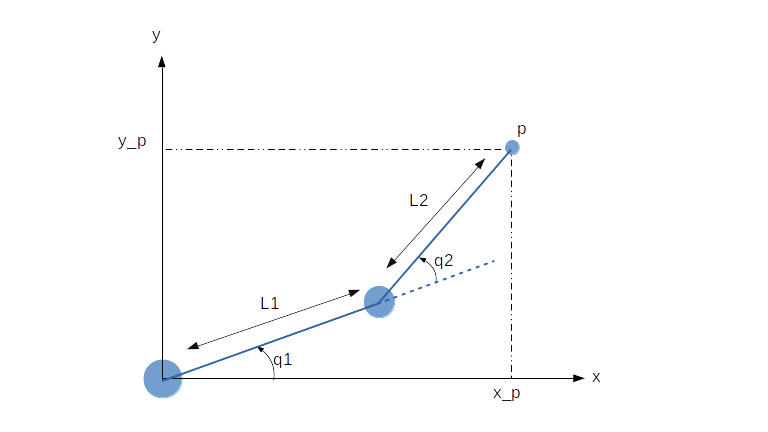

In [5]:
# Display the 1R robot
Image("2dof.png")

__Question__ : derive the DKM of the 2R robot by differentiating the DGM

Hint : View the DGM as a vector $p = [f_1(q), f_2(q)]^T$. Then the DKM be written under matrix form as 

$$
\dot{p} = J(q)\dot{q}
$$

where $J(q)$ is the __Jacobian__ of the 2R robot. It is a $2\times 2$ matrix containing the partial derivatives of the DKM with respect to $q_1, q_2$, i.e. 

$$
J(q) = \begin{bmatrix} \frac{\partial f_1(q)}{\partial q_1},~ \frac{\partial f_1(q)}{\partial q_2} \\
                       \frac{\partial f_2(q)}{\partial q_1},~ \frac{\partial f_2(q)}{\partial q_2} 
       \end{bmatrix} 
$$

Note: If you are already familiar with derivatives, the _partial_ derivative is not much different. See an example [here](https://www.mathsisfun.com/calculus/derivatives-partial.html)

__Answer__ : We know the DGM as

$$
p = \begin{bmatrix} x_p \\
                    y_p
           \end{bmatrix} =\begin{bmatrix} L_1 \cos(q_1) + L_2 \cos(q_1 + q_2) \\
                                          L_1 \sin(q_1) + L_2 \sin(q_1 + q_2) 
                         \end{bmatrix} = \begin{bmatrix}f_1(q) \\
                                                          f_2(q)
                                         \end{bmatrix} 
$$

The Jacobian is, by definition 

$$
J(q) = \begin{bmatrix} \frac{\partial f_1(q)}{\partial q_1},~ \frac{\partial f_1(q)}{\partial q_2} \\
                       \frac{\partial f_2(q)}{\partial q_1},~ \frac{\partial f_2(q)}{\partial q_2} 
       \end{bmatrix} = \begin{bmatrix} -L_1 \sin(q_1) - L_2 \sin(q_1 + q_2),~ - L_2 \sin(q_1 + q_2)\\
                                       L_1 \cos(q_1) + L_2 \cos(q_1 + q_2),~ L_2 \cos(q_1 + q_2)
                       \end{bmatrix}
$$

__Question__: Derive the DKM for the 2R robot by computing the jacobian $J(q)$ for the 2R robot.

__Question__ : How would you derive the IKM from the previous question ? What issues can arise with $J(q)$ ? For which value(s) of $q$ do they arise ?

Hint: recall the [_determinant_](https://www.mathsisfun.com/algebra/matrix-determinant.html) of a matrix.

__Answer__ : If $\text{det}(J(q)) \neq 0$, then $J(q)$ is invertible and the IKM can be calculated as

$$
\dot{q} = J(q)^{-1}\dot{p}
$$

However if $\text{det}(J(q)) = 0$, $J(q)$ is not invertible and the IKM is not well-defined. We have :

$$
\text{det}(J(q)) = J_{11} J_{22} - J_{21} J_{12}
$$

After a rather simple calculation the determinant turns out to be 

$$
\text{det}(J(q)) = L_1 L_2 \sin(q_2)
$$

We can see that the determinant becomes $0$ whenever $q = k\pi$. When this happens, the Jacobian becomes __singular__ , i.e. its inverse (and consequently, the IKM) is not well defined. 

__Question__ : Implement the direct and inverse kinematic models of the 2R robot (complete the following code).

__Answer__ :

In [6]:
class KinematicModel2R:
    '''
    Environment class for the 2R robot kinematics
    '''
    def __init__(self, L1=1., L2=1.):
        ''' 
        Initialize model parameters
        '''
        self.L1 = L1
        self.L2 = L2

    def jacobian(self, q):
        '''
        Calculate the 2x2 Jacobian matrix 
        Input : joint position q
        Output : Jacobian matrix
        '''
        q1 = q[0]
        q2 = q[1]
        jac = np.matrix([[-self.L1*np.sin(q1)-self.L2*np.sin(q1+q2), -self.L2*np.sin(q1+q2)],
                         [self.L1*np.cos(q1)+self.L2*np.cos(q1+q2), self.L2*np.cos(q1+q2)]])
        return jac
    
    def DKM(self, q, qdot):
        '''
        Direct Kinematic Model function
        Input : joint positions q=(q1,q2) (in rad)
        Output : end-effector velocity (in m/s)
        '''
        # Use jacobian
        pdot = self.jacobian(q).dot(q)
        return pdot

    def IKM(self, q, pdot):
        '''
        Inverse Kinematic Model function
        Input : end-effector velocity (in m and m/s), joint positions q (in rad)
        Output : joint velocity (rad/s)
        '''
        # Get Jacobian matrix
        jac = self.jacobian(q)
        # Check if Jacobian is singular
        if(np.linalg.det(jac) == 0):
            print("Singular configuration ! ")
        else:
            # Jacobian (inverse)
            qdot = np.linalg.solve(jac, pdot)
            return qdot

    
# Create kinematics
kinem2R = KinematicModel2R()

# Test DKM
q = np.random.rand(2)
qdot = np.random.rand(2)
pdot = kinem2R.DKM(q, qdot)
print("The end-effector velocity corresponding to qdot = "+str(qdot)+" is : pdot = "+str(pdot))

# Test IKM
q = np.random.rand(2)
pdot = np.random.rand(2)
qdot = kinem2R.IKM(q, pdot)
print("The joint velocity corresponding to pdot = "+str(pdot)+" is : qdot = "+str(qdot))

The end-effector velocity corresponding to qdot = [0.0953 0.0002] is : pdot = [[-0.3498  0.5021]]
The joint velocity corresponding to pdot = [0.3656 0.4841] is : qdot = [ 0.7025 -1.2815]


We derived the direct and inverse kinematic models of the 1R and 2R robots. This enables to relate velocities in the joint space of the robot to velocities of its end-effector in the task space. The robot kinematics constitutes the basis of trajectory generation and motion planning, as we will see in the next Notebook.